<h1>MNIST DATASET </h1>

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
import cv2
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from tensorflow.keras.layers import Dense, Dropout, Flatten # core layers
from tensorflow.keras.layers import BatchNormalization
import warnings                      
warnings.simplefilter("ignore")  # ignores the warning

# Load .npy file

In [2]:
# Load the MNIST data from .npy file
data = np.load('data/mnist_data.npy', allow_pickle=True)
images = data.item().get('images')
labels = data.item().get('labels')

# Visualize

In [3]:
import random

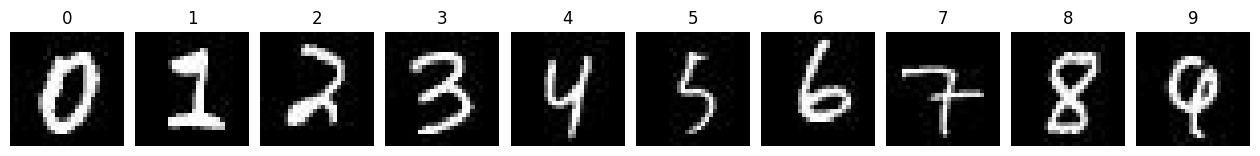

In [4]:
def random_value_for_index(labels, target_value):
    indices = [index for index, value in enumerate(labels) if value == target_value]
    return random.choice(indices)

# Define categories
categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Create subplots
fig, axs = plt.subplots(1, 10, figsize=(16, 16))

for index, category in enumerate(categories):
    # Select random image index from specific category
    random_index = random_value_for_index(labels, category)
    # Plot the random image
    axs[index].imshow(images[random_index].reshape(28, 28), cmap='gray')
    axs[index].axis('off')
    axs[index].set_title(category)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

# Train Test Split

In [5]:
x_train,x_test,y_train,y_test = train_test_split(images, labels, test_size=0.2, random_state=11)

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [7]:
x_train_reshaped = x_train.reshape((-1,28, 28,1))
x_test_reshaped = x_test.reshape((-1,28,28,1))

In [8]:
print("X_train shape : ",x_train_reshaped.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape : ",x_test_reshaped.shape)
print("y_test shape : ",y_test.shape)


X_train shape :  (33600, 28, 28, 1)
y_train shape :  (33600,)
X_test shape :  (8400, 28, 28, 1)
y_test shape :  (8400,)


# Train CNN model

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [10]:
model=Sequential()

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=16, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
    
model.add(Dense(10,activation="softmax"))
    

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        9232      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                        

# Early Stopping

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_accuracy',patience=5)

In [13]:
# log_dir = "logs/mnist_cnn/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/mnist_cnn/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Compile

In [14]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train

In [15]:
history = model.fit(x_train_reshaped, y_train, epochs=5, batch_size=32, validation_split=0.3,callbacks=[early_stop,tensorboard_callback])

Epoch 1/5
735/735 [==============================] - 103s 123ms/step - loss: 0.4595 - accuracy: 0.8739 - val_loss: 0.2120 - val_accuracy: 0.9448
Epoch 2/5
735/735 [==============================] - 102s 138ms/step - loss: 0.1140 - accuracy: 0.9659 - val_loss: 0.1009 - val_accuracy: 0.9701
Epoch 3/5
735/735 [==============================] - 95s 130ms/step - loss: 0.0780 - accuracy: 0.9775 - val_loss: 0.0933 - val_accuracy: 0.9719
Epoch 4/5
735/735 [==============================] - 113s 154ms/step - loss: 0.0626 - accuracy: 0.9819 - val_loss: 0.0798 - val_accuracy: 0.9751
Epoch 5/5
735/735 [==============================] - 98s 133ms/step - loss: 0.0514 - accuracy: 0.9851 - val_loss: 0.0732 - val_accuracy: 0.9782


# Metrics

In [16]:
metrics=pd.DataFrame(model.history.history)

<Axes: >

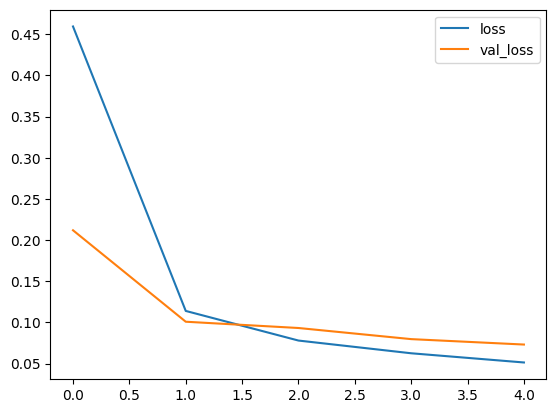

In [17]:
metrics[['loss','val_loss']].plot()

<Axes: >

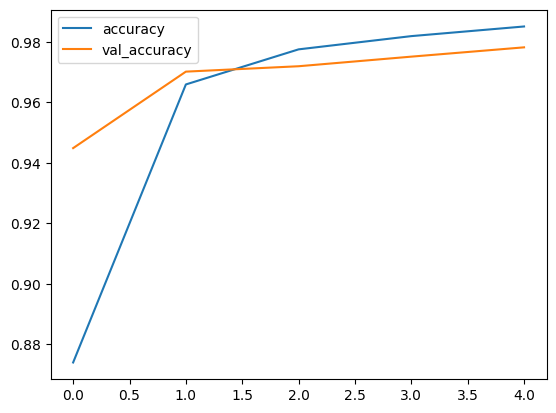

In [18]:
metrics[['accuracy', 'val_accuracy']].plot()

In [19]:
model.save("model/mnist_cnn.h5")

In [20]:
from keras.models import load_model
model= load_model("model/mnist_cnn.h5")

# Predict on Test data

In [21]:
y_pred = model.predict(x_test_reshaped)

263/263 [==============================] - 13s 37ms/step


In [22]:
y_pred = np.argmax(y_pred, axis=1)

<h2>Model Evaluation</h2>

In [23]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report

In [24]:
print("Model's acuracy :",accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test,average="macro"))
print("Precision-Score :",precision_score(y_pred,y_test,average="macro"))
print("F1-Score :",f1_score(y_pred,y_test,average="macro"))

Model's acuracy : 0.9754761904761905
Recall-Score : 0.9754373725998319
Precision-Score : 0.975289453998738
F1-Score : 0.975260011962636


In [25]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       847
           1       0.99      0.99      0.99       930
           2       0.98      0.97      0.97       864
           3       0.97      0.98      0.97       862
           4       0.98      0.98      0.98       825
           5       0.96      0.99      0.98       750
           6       0.97      0.99      0.98       791
           7       0.98      0.98      0.98       906
           8       0.99      0.94      0.97       819
           9       0.97      0.96      0.96       806

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



# Confusion Matrix

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

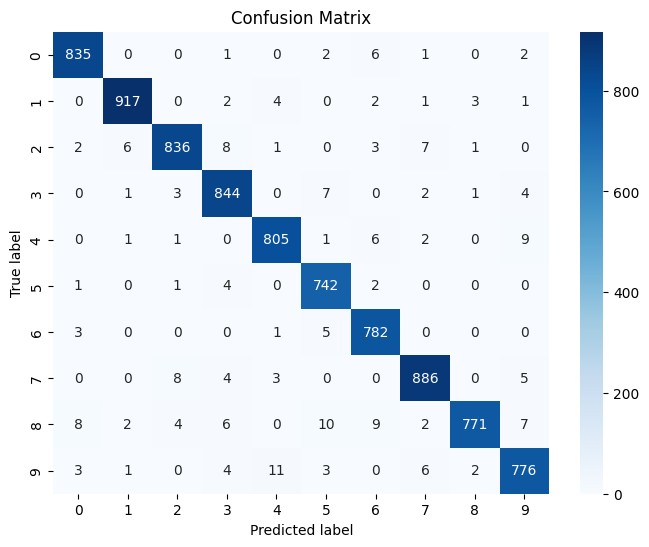

In [27]:
# Compute confusion matrix
cm = confusion_matrix(y_pred , y_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Visualize

In [28]:
from tensorflow.keras.models import Model

In [29]:
def get_layer_output(model, layer_name, input_image):
    layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    output = layer_model.predict(input_image)
    return output

def plot_conv_layer_outputs(layer_output, layer_name, num_columns=8):
    num_filters = layer_output.shape[-1]
    size = layer_output.shape[1]
    
    num_rows = int(np.ceil(num_filters / num_columns))
    
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns*2, num_rows*2))
    axes = axes.flatten()
    
    for i in range(num_filters):
        ax = axes[i]
        ax.imshow(layer_output[0, :, :, i], cmap='gray')
        ax.axis('off')
        ax.set_title(f'{layer_name} {i+1}')
    
    # Hide unused subplots
    for j in range(num_filters, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

def plot_dense_layer_output(layer_output, layer_name):
    plt.figure(figsize=(10, 5))
    plt.bar(range(layer_output.shape[1]), layer_output[0], color='skyblue')
    plt.title(f'{layer_name} Output')
    plt.xlabel('Neuron')
    plt.ylabel('Activation')
    plt.grid(True)
    plt.show()


In [30]:
sample_image = cv2.imread("data/test/img_3.jpg",cv2.IMREAD_GRAYSCALE)
sample_image = np.expand_dims(sample_image, axis=0)  


1/1 [==============================] - 0s 348ms/step


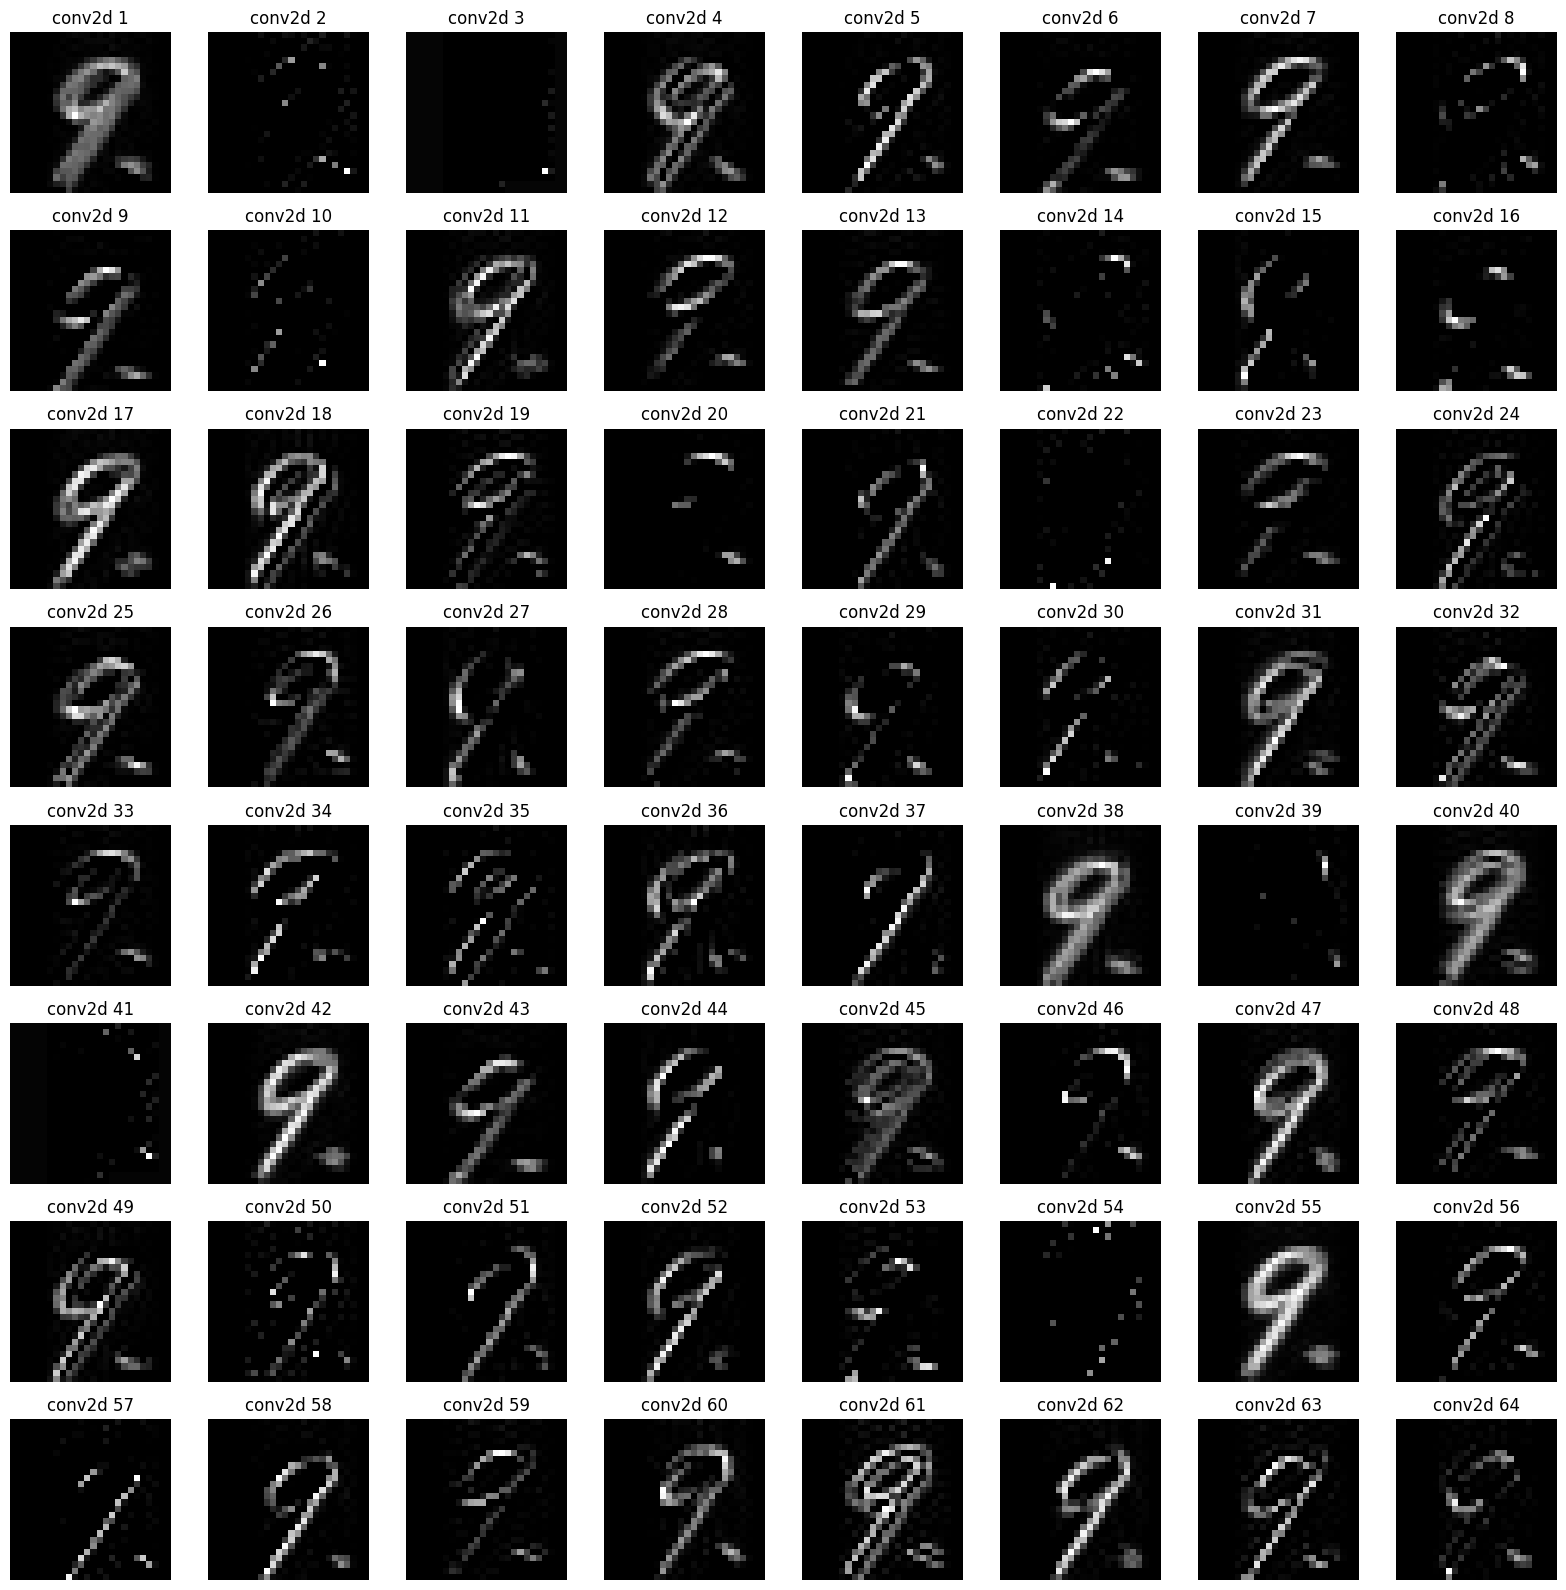

1/1 [==============================] - 3s 3s/step


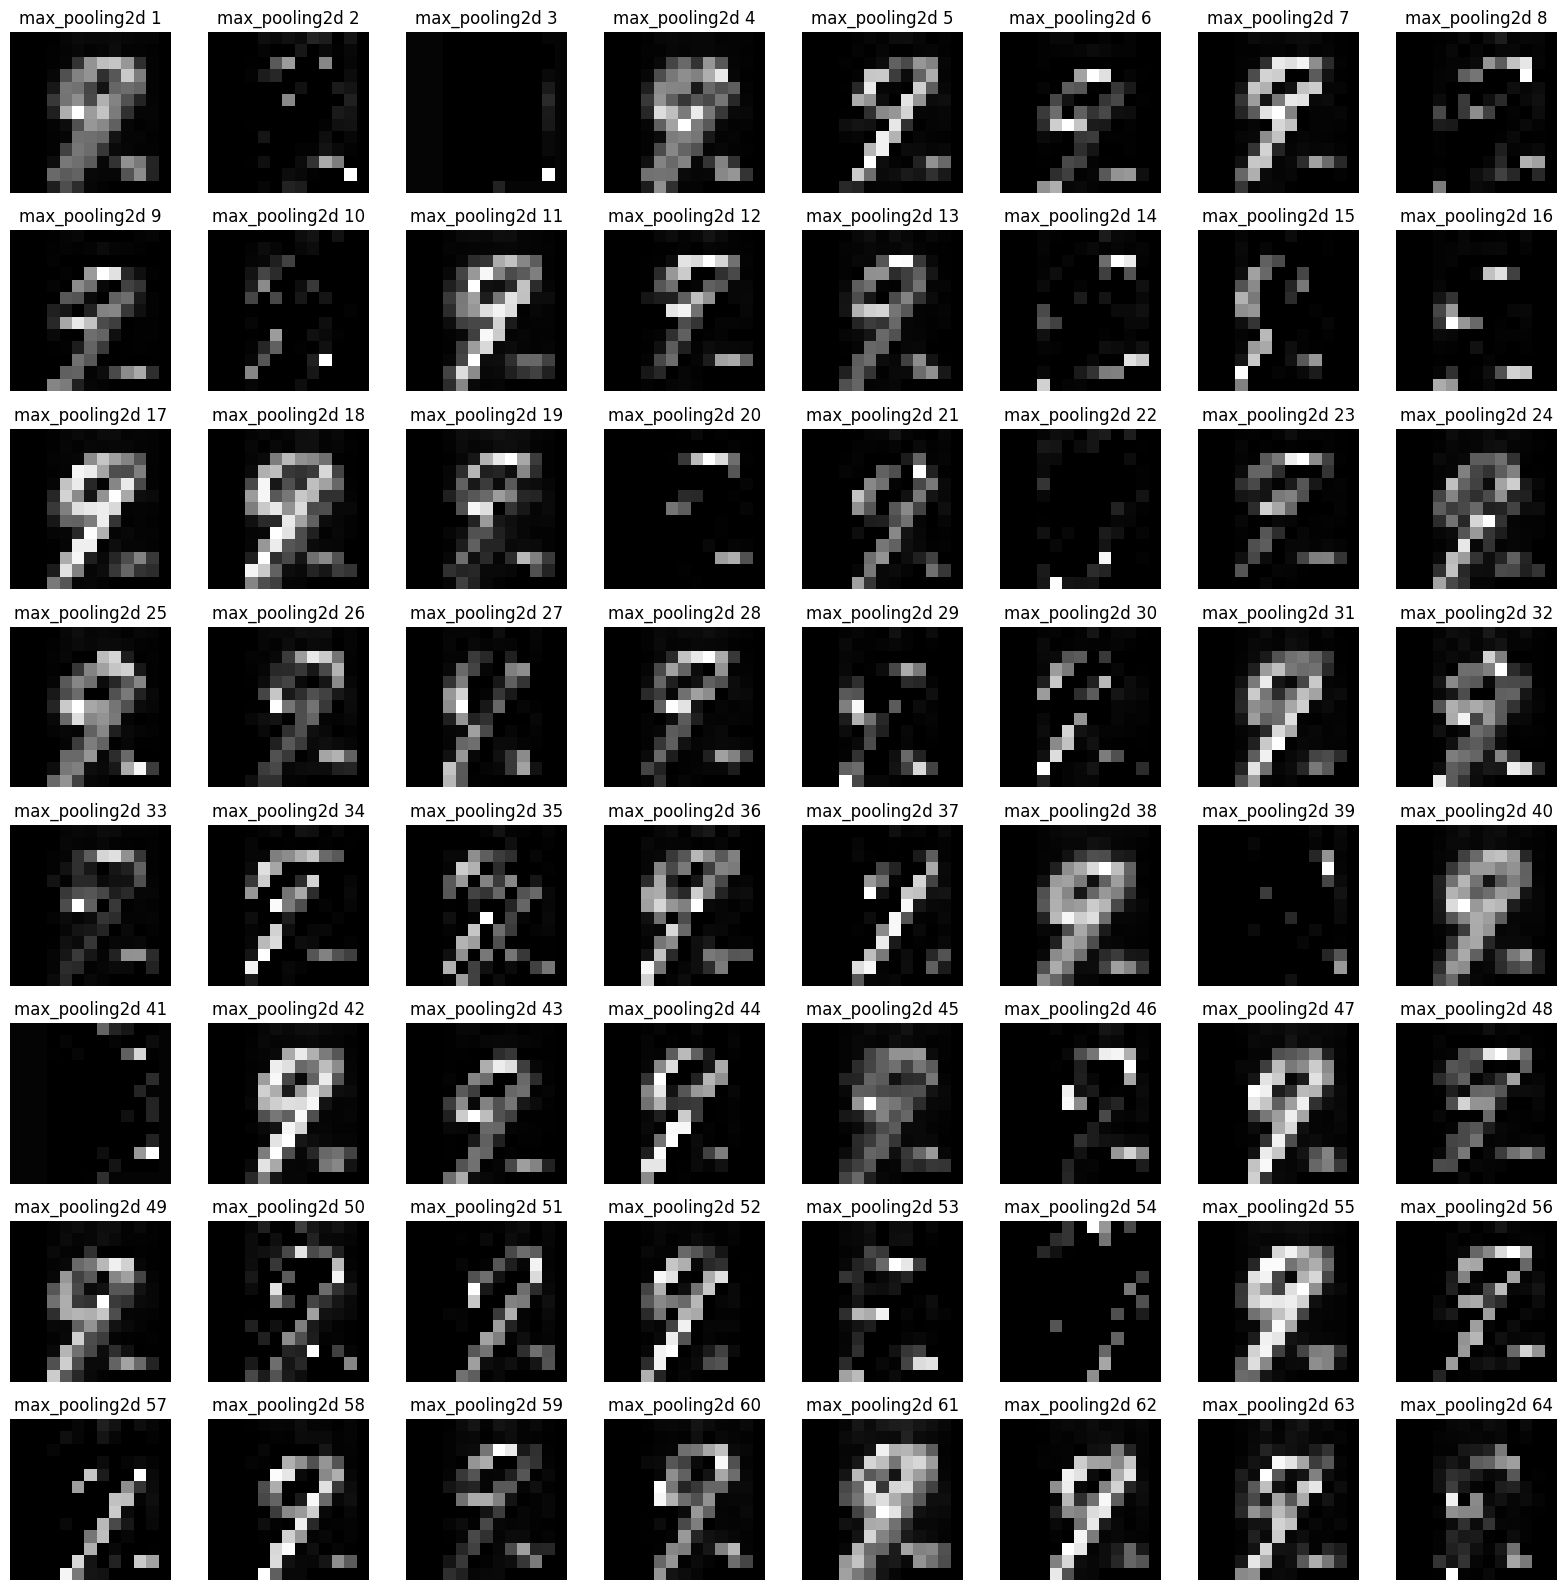

1/1 [==============================] - 4s 4s/step


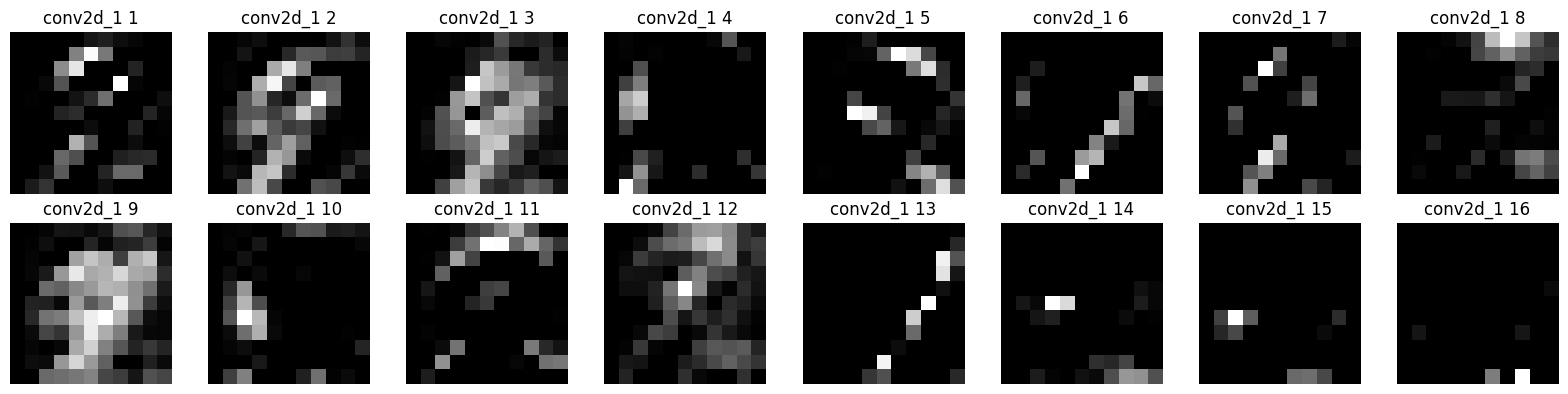

1/1 [==============================] - 2s 2s/step


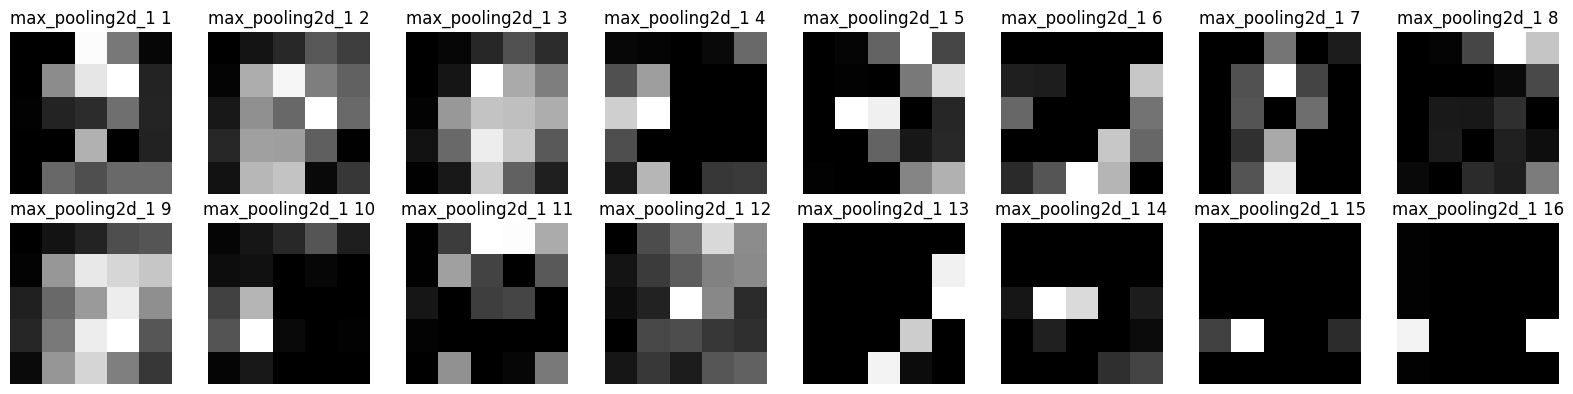

1/1 [==============================] - 2s 2s/step


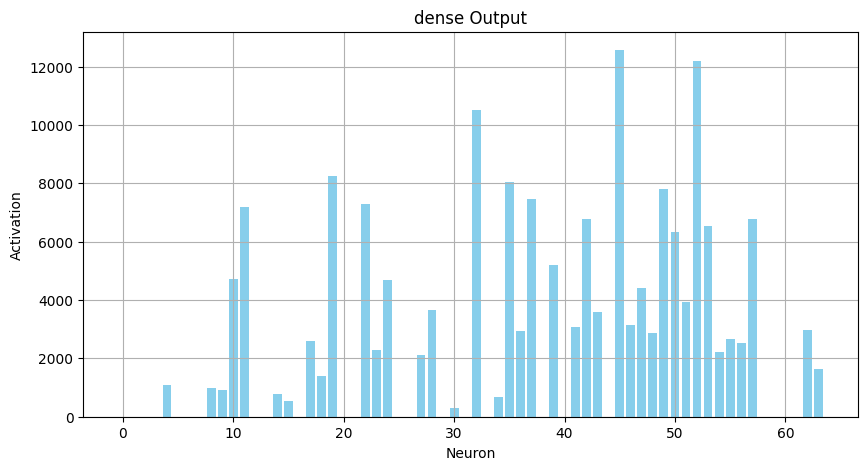

1/1 [==============================] - 2s 2s/step


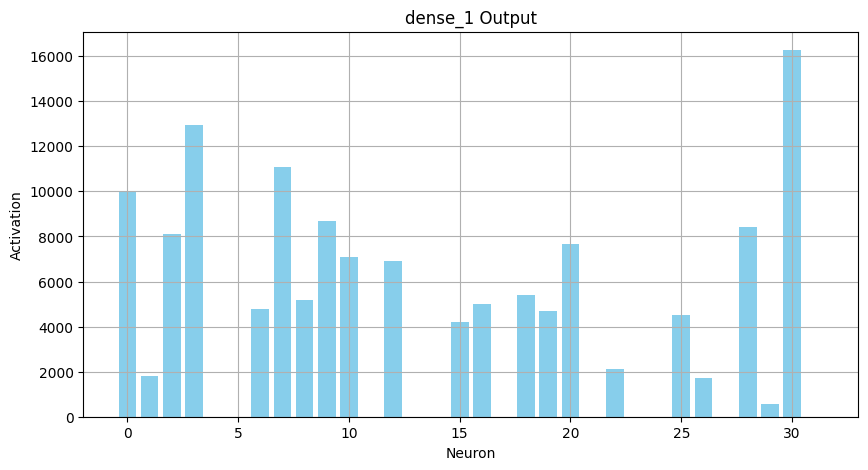

1/1 [==============================] - 2s 2s/step


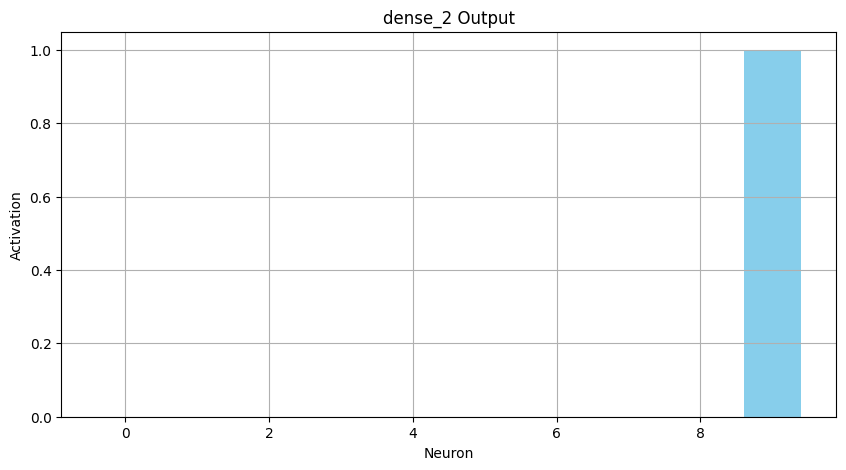

In [31]:
# Iterate through all layers to get and plot activations
for layer in model.layers:
    print(layer)
    
    # For convolutional layers
    if 'conv' in layer.name:
        layer_output = get_layer_output(model, layer.name, sample_image)
        plot_conv_layer_outputs(layer_output, layer.name)
    
    # For dense layers
    elif 'dense' in layer.name:
        layer_output = get_layer_output(model, layer.name, sample_image)
        plot_dense_layer_output(layer_output, layer.name)
    
    # For max pooling layers
    elif 'pool' in layer.name or 'max_pool' in layer.name:
        layer_output = get_layer_output(model, layer.name, sample_image)
        plot_conv_layer_outputs(layer_output, layer.name)  # Use the same function as for conv layers


# Assignment

<li> Perform Inference </li>